In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
dataset_tr = pd.read_csv('/kaggle/input/titanic/train.csv')
dataset_pred = pd.read_csv('/kaggle/input/titanic/test.csv')
dataset_pred_results = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
dataset_tr.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataset_pred.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


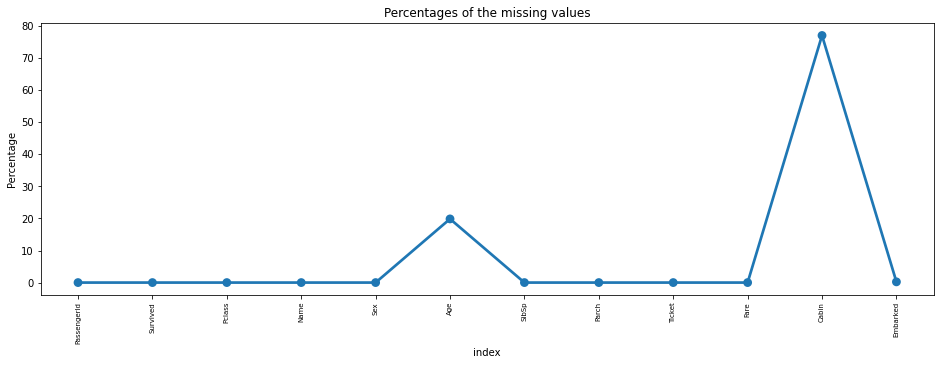

In [5]:
missing_tr = pd.DataFrame((dataset_tr.isnull().sum())*100/dataset_tr.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot('index',0, data = missing_tr)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentages of the missing values")
plt.ylabel("Percentage")
plt.show()

In [6]:
dataset_tr.drop(labels=["Name", "Cabin","PassengerId","Ticket"], axis=1, inplace=True)
dataset_pred.drop(labels=["Name", "Cabin","PassengerId","Ticket"], axis=1, inplace=True)

In [7]:
dataset_tr.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
dataset_tr["Age"].interpolate(method="linear", inplace=True)

In [9]:
dataset_tr.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [10]:
dataset_tr.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


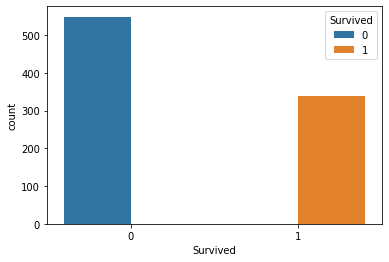

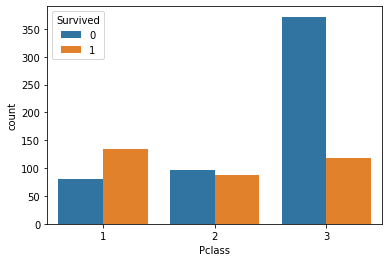

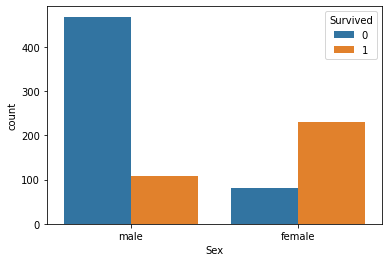

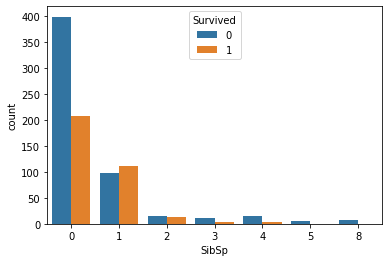

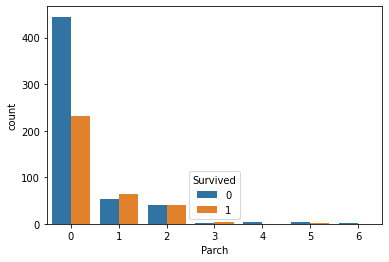

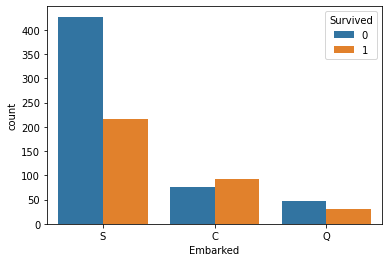

In [11]:
for i, predictor in enumerate(dataset_tr.drop(columns = ['Age','Fare'])):
  plt.figure(i)
  sns.countplot(data = dataset_tr, x = predictor, hue = 'Survived')

In [12]:
dataset_tr.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 94.8+ KB


In [13]:
dataset_tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
x_train = dataset_tr.iloc[:,[1,2,3,4,5,6,7]].values
y_train = dataset_tr.iloc[:,0].values

In [15]:
x_train[0:5]

array([[3, 'male', 22.0, 1, 0, 7.25, 'S'],
       [1, 'female', 38.0, 1, 0, 71.2833, 'C'],
       [3, 'female', 26.0, 0, 0, 7.925, 'S'],
       [1, 'female', 35.0, 1, 0, 53.1, 'S'],
       [3, 'male', 35.0, 0, 0, 8.05, 'S']], dtype=object)

In [16]:
y_train[0:5]

array([0, 1, 1, 1, 0])

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1,6])], remainder = 'passthrough')
x_train = np.array(ct.fit_transform(x_train))

In [19]:
dataset_tr[0:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [21]:
y_train[0:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [22]:
x_tr,x_te,y_tr,y_te = train_test_split(x_train,y_train,test_size= 0.2,random_state = 1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
x_tr[:,[6,9]] = sc.fit_transform(x_tr[:,[6,9]])
x_te[:,[6,9]] = sc.transform(x_te[:,[6,9]])

In [25]:
x_tr = x_tr.astype('float32')
y_tr = y_tr.astype('float32')
x_te = x_te.astype('float32')
y_te = y_te.astype('float32')

In [26]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(128,         
                        input_shape=(10,), 
                        name='Hidden-Layer-1', 
                        activation='relu'))    


model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))

model.add(keras.layers.Dense(2,
                             name='Output-Layer',
                             activation='softmax'))

2022-12-21 20:18:25.749926: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [27]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-Layer-1 (Dense)       (None, 128)               1408      
_________________________________________________________________
Hidden-Layer-2 (Dense)       (None, 128)               16512     
_________________________________________________________________
Hidden-Layer-3 (Dense)       (None, 128)               16512     
_________________________________________________________________
Output-Layer (Dense)         (None, 2)                 258       
Total params: 34,690
Trainable params: 34,690
Non-trainable params: 0
_________________________________________________________________


In [29]:
for epoch in range(1, 10000, 1000):
    model.fit(x_tr,y_tr,verbose=1)
    



2022-12-21 20:18:25.899632: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


23/23 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8439


In [30]:
model.evaluate(x_te,y_te)

6/6 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8315


[0.40446874499320984, 0.8314606547355652]

In [31]:
dataset_pred.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [32]:
dataset_pred = dataset_pred.assign(Survived=dataset_pred_results['Survived'])

In [33]:
dataset_pred.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


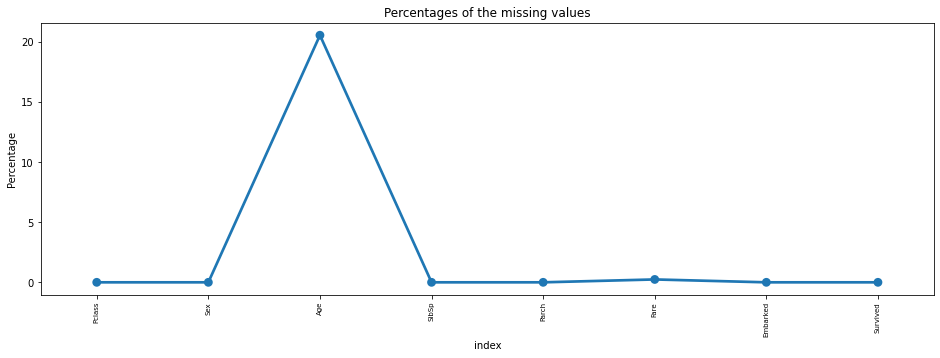

In [34]:
missing_pred = pd.DataFrame((dataset_pred.isnull().sum())*100/dataset_pred.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot('index',0, data = missing_pred)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentages of the missing values")
plt.ylabel("Percentage")
plt.show()

In [35]:
dataset_pred["Age"].interpolate(method="linear", inplace=True)
dataset_pred["Fare"].interpolate(method="linear", inplace=True)

In [36]:
dataset_pred.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [37]:
dataset_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [38]:
x_preds = dataset_pred.iloc[:,:-1].values
y_res_o = dataset_pred.iloc[:,-1].values

In [39]:
x_preds[0:5]

array([[3, 'male', 34.5, 0, 0, 7.8292, 'Q'],
       [3, 'female', 47.0, 1, 0, 7.0, 'S'],
       [2, 'male', 62.0, 0, 0, 9.6875, 'Q'],
       [3, 'male', 27.0, 0, 0, 8.6625, 'S'],
       [3, 'female', 22.0, 1, 1, 12.2875, 'S']], dtype=object)

In [40]:
ct2 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1,6])], remainder = 'passthrough')
x_preds = np.array(ct2.fit_transform(x_preds))

In [41]:
x_preds[0:5]

array([[0.0, 1.0, 0.0, 1.0, 0.0, 3, 34.5, 0, 0, 7.8292],
       [1.0, 0.0, 0.0, 0.0, 1.0, 3, 47.0, 1, 0, 7.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 2, 62.0, 0, 0, 9.6875],
       [0.0, 1.0, 0.0, 0.0, 1.0, 3, 27.0, 0, 0, 8.6625],
       [1.0, 0.0, 0.0, 0.0, 1.0, 3, 22.0, 1, 1, 12.2875]], dtype=object)

In [42]:
x_preds[:,[6,9]] = sc.fit_transform(x_preds[:,[6,9]])

In [43]:
x_preds[0:5]

array([[0.0, 1.0, 0.0, 1.0, 0.0, 3, 0.3303105550885295, 0, 0,
        -0.49718464630629017],
       [1.0, 0.0, 0.0, 0.0, 1.0, 3, 1.2571601083245891, 1, 0,
        -0.512048145142785],
       [0.0, 1.0, 0.0, 1.0, 0.0, 2, 2.369379572207861, 0, 0,
        -0.46387441971697707],
       [0.0, 1.0, 0.0, 0.0, 1.0, 3, -0.22579917685310627, 0, 0,
        -0.482247654530541],
       [1.0, 0.0, 0.0, 0.0, 1.0, 3, -0.5965389981475301, 1, 1,
        -0.4172691411654978]], dtype=object)

In [44]:
y_res_o[0:5]

array([0, 1, 0, 0, 1])

In [45]:
y_res = tf.keras.utils.to_categorical(y_res_o, num_classes=2)

In [46]:
x_preds = x_preds.astype('float32')
y_res = y_res.astype('float32')

In [47]:
pred = model.predict(x_preds)
print("Probability Predictions :\n" , pred)

Probability Predictions :
 [[0.8889945  0.11100555]
 [0.36201584 0.6379841 ]
 [0.9330958  0.06690422]
 [0.8427287  0.15727134]
 [0.54687184 0.45312813]
 [0.82195145 0.17804855]
 [0.13780409 0.86219597]
 [0.7655766  0.23442343]
 [0.26568726 0.7343127 ]
 [0.9137763  0.08622369]
 [0.847386   0.15261394]
 [0.6588309  0.3411691 ]
 [0.0205754  0.9794246 ]
 [0.83202744 0.16797252]
 [0.01131387 0.9886861 ]
 [0.08218965 0.9178104 ]
 [0.8442086  0.1557914 ]
 [0.71774244 0.28225762]
 [0.5097557  0.49024424]
 [0.34207952 0.6579204 ]
 [0.37634093 0.62365913]
 [0.2825672  0.7174328 ]
 [0.03309266 0.9669074 ]
 [0.17894588 0.8210541 ]
 [0.18350343 0.81649655]
 [0.89965355 0.10034647]
 [0.03161318 0.96838677]
 [0.72915757 0.27084237]
 [0.62591666 0.3740833 ]
 [0.8778937  0.12210628]
 [0.817929   0.18207103]
 [0.8834169  0.11658307]
 [0.54547924 0.4545208 ]
 [0.5245316  0.4754684 ]
 [0.34598777 0.6540122 ]
 [0.70155716 0.29844287]
 [0.34207502 0.657925  ]
 [0.3500658  0.6499343 ]
 [0.8451292  0.15487078

In [48]:
pred.shape

(418, 2)

In [49]:
 print('Predicted Outputs: ')
for i in range(417):
    predicts = np.argmax(pred[i])
    if predicts == 0:
        result = "No"
    else:
        result = "Yes"
    print(result)

Predicted Outputs: 
No
Yes
No
No
No
No
Yes
No
Yes
No
No
No
Yes
No
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
No
No
No
No
No
No
Yes
No
Yes
Yes
No
No
No
No
No
Yes
Yes
No
No
No
Yes
No
No
No
Yes
Yes
No
No
No
No
No
Yes
No
No
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
Yes
No
Yes
No
Yes
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
No
Yes
No
No
Yes
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
No
No
No
Yes
Yes
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
No
Yes
No
No
No
No
No
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
No
No
No
No
Yes
No
No
Yes
No
Yes
No
Yes
No
Yes
No
Yes
No
No
Yes
No
No
No
Yes
No
No
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
No
No
No
Yes
No
Yes
Yes
Yes
No
Yes
No
No
No
No
No
Yes
No
No
No
Yes
Yes
No
No
No
No
Yes
No
No
No
Yes
Yes
No
Yes
No
No
No
No
Yes
Yes
Yes
Yes
Yes
No
No
No


In [50]:
y_res_o.shape

(418,)

In [51]:
print('Actual Outputs:')
for j in range(417):
    if y_res_o[j] == 0:
        print('No')
    else:
        print('Yes')


Actual Outputs:
No
Yes
No
No
Yes
No
Yes
No
Yes
No
No
No
Yes
No
Yes
Yes
No
No
Yes
Yes
No
No
Yes
No
Yes
No
Yes
No
No
No
No
No
Yes
Yes
No
No
Yes
Yes
No
No
No
No
No
Yes
Yes
No
No
No
Yes
Yes
No
No
Yes
Yes
No
No
No
No
No
Yes
No
No
No
Yes
No
Yes
Yes
No
No
Yes
Yes
No
Yes
No
Yes
No
No
Yes
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
No
Yes
No
Yes
No
No
No
Yes
No
Yes
No
Yes
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
No
Yes
No
No
Yes
No
Yes
No
No
No
No
Yes
No
No
No
No
No
Yes
No
Yes
Yes
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
Yes
Yes
No
Yes
Yes
No
Yes
No
No
Yes
No
No
Yes
Yes
No
No
No
No
No
Yes
Yes
No
Yes
Yes
No
No
Yes
No
Yes
No
Yes
No
Yes
No
No
No
No
No
No
No
No
Yes
No
Yes
Yes
No
No
Yes
No
No
Yes
No
Yes
No
No
No
No
Yes
Yes
No
Yes
No
Yes
No
Yes
No
Yes
No
Yes
Yes
No
Yes
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
Yes
No
No
No
No
Yes
No
Yes
Yes
Yes
No
No
No
No
No
No
No
Yes
No
No
No
Yes
Yes
No
No
No
No
Yes
No
No
No
Yes
Yes
No
Yes
No
No
No
No
Yes
No
Yes
Yes
Yes
No
No
No
No
No
No
Yes

In [52]:
model.evaluate(x_preds,y_res)

14/14 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.9115


[0.311116099357605, 0.9114832282066345]

In [53]:
dataset_pred_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [54]:
submission = dataset_pred_results[['PassengerId']]

In [55]:
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [56]:
preds = np.array(pred)

In [57]:
preds

array([[0.8889945 , 0.11100555],
       [0.36201584, 0.6379841 ],
       [0.9330958 , 0.06690422],
       [0.8427287 , 0.15727134],
       [0.54687184, 0.45312813],
       [0.82195145, 0.17804855],
       [0.13780409, 0.86219597],
       [0.7655766 , 0.23442343],
       [0.26568726, 0.7343127 ],
       [0.9137763 , 0.08622369],
       [0.847386  , 0.15261394],
       [0.6588309 , 0.3411691 ],
       [0.0205754 , 0.9794246 ],
       [0.83202744, 0.16797252],
       [0.01131387, 0.9886861 ],
       [0.08218965, 0.9178104 ],
       [0.8442086 , 0.1557914 ],
       [0.71774244, 0.28225762],
       [0.5097557 , 0.49024424],
       [0.34207952, 0.6579204 ],
       [0.37634093, 0.62365913],
       [0.2825672 , 0.7174328 ],
       [0.03309266, 0.9669074 ],
       [0.17894588, 0.8210541 ],
       [0.18350343, 0.81649655],
       [0.89965355, 0.10034647],
       [0.03161318, 0.96838677],
       [0.72915757, 0.27084237],
       [0.62591666, 0.3740833 ],
       [0.8778937 , 0.12210628],
       [0.

In [58]:
predicts_out = np.argmax(preds, axis=1)

In [59]:
predicts_out.shape

(418,)

In [60]:
submission['Survived'] = predicts_out

In [61]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
submission.to_csv('submission.csv')